# Popular Data Science Questions

We're tasked with figuring out what is best content to write about within a data science related content website. 

For this, we're going to use stack exchange.

>Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

>https://stackexchange.com/tour

>https://stackexchange.com/sites?view=list#percentanswered

>by: Dataquest.io

We're going to use DSSE using the below link
https://datascience.stackexchange.com/

We can notice that SE uses 'tags' to categorize its content.

>Stack Exchange provides a public data base for each of its websites. Here's a link to query and explore Data Science Stack Exchange's database. 

>https://data.stackexchange.com/datascience/query/new

>Note that SEDE uses a different dialect (Transact-SQL — Microsoft's SQL) than SQLite
differences issues helpful resouce: 

>https://www.mssqltips.com/sqlservertip/4777/comparing-some-differences-of-sql-server-to-sqlite/

>by: Dataquest.io

We can use the amazing database query system provided by SE

From the database tables, we can gain a lot of information for our requirement from the 'tags' table and the 'posts' table.

>1. Id: An identification number for the post.
2. PostTypeId: An identification number for the type of post.
3. CreationDate: The date and time of creation of the post.
4. Score: The post's score.
5. ViewCount: How many times the post was viewed.
6. Tags: What tags were used.
7. AnswerCount: How many answers the question got (only applicable to question posts).
8. FavoriteCount: How many times the question was favored (only applicable to question posts).

>by: Dataquest.io

We can confirm the type of posts by running this query:
```
SELECT PostTypeId, COUNT(*) as NrOfPosts
FROM posts
GROUP BY PostTypeId;
```
>Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019. (At the time of writing it is early 2020). 

> by: Dataquest.io

To extract the columns listed above:
```
SELECT Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount FROM Posts
where CreationDate >= '2019-01-01 00:00:00' AND CreationDate <= '2019-12-31 12:59:59'
ORDER BY CreationDate;
```

In [1]:
#results
file = '2019_questions.csv'

In [2]:
!head $file

A simple exploration shows that `FavoriteCount` contains missing values.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(file, parse_dates=['CreationDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [5]:
df.shape

(8839, 7)

In [6]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


# Cleaning
We'll clean the `FavoriteCount` and explore more to do further cleaning.

In [7]:
df['FavoriteCount'].value_counts(dropna=False)

NaN      7432
 1.0      953
 2.0      205
 0.0      175
 3.0       43
 4.0       12
 5.0        8
 6.0        4
 7.0        4
 11.0       1
 8.0        1
 16.0       1
Name: FavoriteCount, dtype: int64

Exploring other missing values

In [8]:
df.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

Here, it seems that only the `FavoriteCount` column is having missing values.

In [9]:
df['FavoriteCount'].isnull().sum() / df.shape[0] * 100

84.08190971829393

The `FavoriteCount` column's missing data is arround 84% of the total data count.

In [10]:
df.fillna(0, inplace=True)
df['FavoriteCount'] = df['FavoriteCount'].astype(int)

Handling tag columns.

In [11]:
df['Tags'] = df['Tags'].str.replace('><',',').str.replace('<','').str.replace('>','')

In [12]:
df['Tags'] = df['Tags'].str.split(',')

# Analysis

In [13]:
# How many times each tag was used
tag_counts = {}
for i in df['Tags']:
    for tag in i:
        if tag in tag_counts:
            tag_counts[tag] += 1
        else:
            tag_counts[tag] = 1

tag_counts_df = pd.DataFrame.from_dict(tag_counts, orient='index')

In [14]:
tag_counts_df[0].sort_values(ascending=False).head(10)

machine-learning    2693
python              1814
deep-learning       1220
neural-network      1055
keras                935
classification       685
tensorflow           584
scikit-learn         540
nlp                  493
cnn                  489
Name: 0, dtype: int64

In [15]:
tag_view_counts = {}

for index, row in df.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_counts:
            tag_view_counts[tag] += row['ViewCount']
        else:
            tag_view_counts[tag] = row['ViewCount']

tag_view_counts_df = pd.DataFrame.from_dict(tag_view_counts, orient='index')

In [16]:
tag_view_counts_df[0].sort_values(ascending=False).head(10)

python              537585
machine-learning    388499
keras               268608
deep-learning       233628
pandas              201787
neural-network      185367
scikit-learn        128110
tensorflow          121369
classification      104457
dataframe            89352
Name: 0, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Tags Counts:

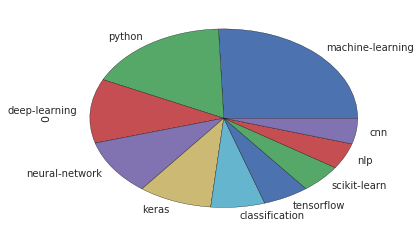

In [18]:
tag_counts_df[0].sort_values(ascending=False).head(10).plot(kind='pie')

Tags View Counts:

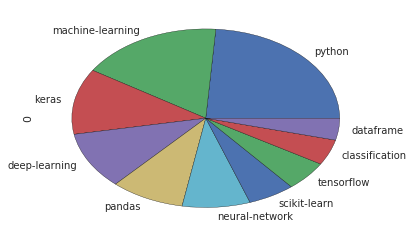

In [19]:
tag_view_counts_df[0].sort_values(ascending=False).head(10).plot(kind='pie')

## Relations between tag pairs

In [20]:
tags_list = list(tag_counts.keys())

In [21]:
relations = pd.DataFrame(index=tags_list, columns=tags_list)
relations.fillna(0, inplace=True)

In [22]:
for tags in df['Tags']:
    relations.loc[tags, tags] += 1

In [30]:
top_used = tag_counts_df.sort_values(0, ascending=False).head(20)

In [33]:
top_viewed = tag_view_counts_df.sort_values(0, ascending=False).head(20)

In [43]:
relations_most_used = relations.loc[top_used.index, top_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
#     helper_df.loc["time-series", "r"] = "background-color: yellow"
#     helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


The blue values are showing the total counts for each single tag. The rest shows the pair counts.

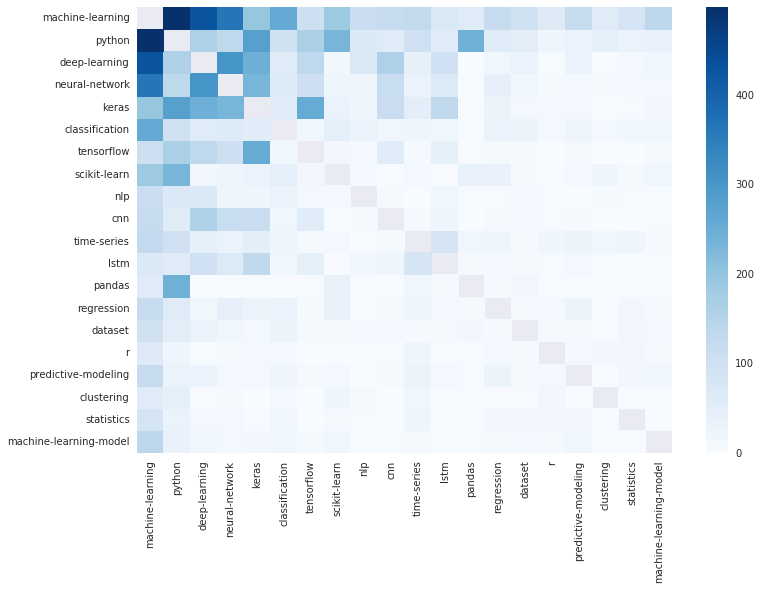

In [49]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Blues", annot=False)

We can notice that the most used tags are also the most viewed. From the top 10 tags of each, these are the tags in common:
1. python
2. machine-learning
3. deep-learning
4. neural-network
5. keras
6. tensorflow
7. classification
8. scikit-learn

keras, and scikit-learn, are all python libraries, so having them come along quite obvious.

# Interest in Deep Learning

Let's identify the interest in questions related to deep learning across time.
```
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
```

In [51]:
!head all_questions.csv

In [69]:
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

In [70]:
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [71]:
all_questions['Tags'] = all_questions['Tags'].str[1:-1].str.split('><')

Tags related to deep learning:

In [77]:
deep_learning_tags = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

Conducting analysis:

In [83]:
def checkDeepLearning(tags_list):
    for tag in tags_list:
        if tag in deep_learning_tags:
            return True
    return False

all_questions['is_deeplearning'] = all_questions['Tags'].apply(checkDeepLearning)

In [85]:
all_questions['is_deeplearning'].value_counts()

False    13758
True      7818
Name: is_deeplearning, dtype: int64

deciding adequate timeframe to track

In [86]:
all_questions['CreationDate'].sort_values().head()

65   2014-05-13 23:58:30
66   2014-05-14 00:11:06
67   2014-05-14 01:25:59
68   2014-05-14 01:41:23
69   2014-05-14 01:57:56
Name: CreationDate, dtype: datetime64[ns]

In [87]:
all_questions['CreationDate'].sort_values(ascending=False).head()

21324   2020-01-19 03:01:03
21323   2020-01-19 02:21:53
21322   2020-01-19 00:49:00
21321   2020-01-18 23:56:27
21320   2020-01-18 21:17:34
Name: CreationDate, dtype: datetime64[ns]

Questions we have start from 2014 up to 2020, so we're going to do the tracking on a monthly basis.

In [91]:
all_questions['yyyymm'] = all_questions['CreationDate'].dt.year * 100 + all_questions['CreationDate'].dt.month

In [107]:
plot_df = all_questions[['is_deeplearning', 'yyyymm']].groupby('yyyymm').count()

In [116]:
plot_df = plot_df.sort_index().copy()

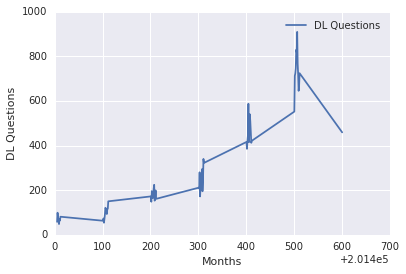

In [127]:
plt.plot(plot_df, label='DL Questions')
plt.legend()
plt.xlabel('Months')
plt.ylabel('DL Questions')

We can see a high rate of deep learning related questions as per the above graph.

# Thank you.
[ha.hashem@outlook.com](ha.hashem@outlook.com)